In [969]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

import pydotplus
from IPython.display import Image
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [970]:
df = pd.read_csv('./food_price.csv')
df.head()

REF_DATE     GEO           DGUID Commodity groups              UOM  UOM_ID  \
0  2007-01  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
1  2007-02  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
2  2007-03  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
3  2007-04  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
4  2007-05  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   

  SCALAR_FACTOR  SCALAR_ID     VECTOR  COORDINATE  VALUE  STATUS  SYMBOL  \
0         units          0  v66449854         1.3   77.4     NaN     NaN   
1         units          0  v66449854         1.3   78.3     NaN     NaN   
2         units          0  v66449854         1.3   80.6     NaN     NaN   
3         units          0  v66449854         1.3   79.0     NaN     NaN   
4         units          0  v66449854         1.3   78.6     NaN     NaN   

   TERMINATED  DECIMALS  
0         NaN         1  
1         NaN         1  
2         NaN         1  
3         NaN         1  
4         NaN         1

In [971]:


# Load the CSV files into Pandas DataFrames
df1 = pd.read_csv('./food_price.csv')
df2 = pd.read_csv('./consumer_price_index_energy.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Energy'})
df3 = pd.read_csv('./consumer_price_index_mort_int.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Mortgage_and_Interest'})
df4 = pd.read_csv('./consumer_price_index_food.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Food'})
df5 = pd.read_csv('./consumer_price_index_gasoline.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Gasoline'})
df6 = pd.read_csv('./consumer_price_index_shelter.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Shelter'})
df7 = pd.read_csv('./consumer_price_index_all_items.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'All_Items'})

# Merge the DataFrames based on the 'REF_DATE' column
df_food_price = pd.merge(df1, df2, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df3, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df4, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df5, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df6, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df7, on='REF_DATE', how='left')

# Print the merged DataFrame
df_food_price


REF_DATE             GEO           DGUID        Commodity groups  \
0      2007-01          Canada  2016A000011124            Grains [A11]   
1      2007-01          Canada  2016A000011124            Grains [A11]   
2      2007-01          Canada  2016A000011124            Grains [A11]   
3      2007-01          Canada  2016A000011124            Grains [A11]   
4      2007-01          Canada  2016A000011124            Grains [A11]   
...        ...             ...             ...                     ...   
88123  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88124  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88125  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88126  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88127  2023-12  Western Canada             NaN  Unprocessed milk [A25]   

                   UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID     VECTOR  \
0      Index, 2007=100     181         units          0  v66449854   
1      Index, 2007=100     181         units          0  v66449854   
2      Index, 2007=100     181         units          0  v66449854   
3      Index, 2007=100     181         units          0  v66449854   
4      Index, 2007=100     181         units          0  v66449854   
...                ...     ...           ...        ...        ...   
88123  Index, 2007=100     181         units          0  v66449969   
88124  Index, 2007=100     181         units          0  v66449969   
88125  Index, 2007=100     181         units          0  v66449969   
88126  Index, 2007=100     181         units          0  v66449969   
88127  Index, 2007=100     181         units          0  v66449969   

       COORDINATE  ...  STATUS  SYMBOL  TERMINATED  DECIMALS  Energy  \
0            1.30  ...     NaN     NaN         NaN         1   125.2   
1            1.30  ...     NaN     NaN         NaN         1   125.2   
2            1.30  ...     NaN     NaN         NaN         1   125.2   
3            1.30  ...     NaN     NaN         NaN         1   125.2   
4            1.30  ...     NaN     NaN         NaN         1   125.2   
...           ...  ...     ...     ...         ...       ...     ...   
88123        9.14  ...     NaN     NaN         NaN         1   197.0   
88124        9.14  ...     NaN     NaN         NaN         1   197.0   
88125        9.14  ...     NaN     NaN         NaN         1   197.0   
88126        9.14  ...     NaN     NaN         NaN         1   197.0   
88127        9.14  ...     NaN     NaN         NaN         1   197.0   

       Mortgage_and_Interest   Food  Gasoline  Shelter  All_Items  
0                       -0.3  110.9     126.4    114.8      109.4  
1                       -0.3  110.9     126.4    114.8      110.9  
2                       -0.3  110.9     126.4    114.8      114.8  
3                       -0.3  110.9     126.4    114.8      102.4  
4                       -0.3  110.9     126.4    114.8       94.2  
...                      ...    ...       ...      ...        ...  
88123                   -0.4  186.8     211.3    177.8      155.2  
88124                   -0.4  186.8     211.3    177.8      156.3  
88125                   -0.4  186.8     211.3    177.8      197.0  
88126                   -0.4  186.8     211.3    177.8      143.1  
88127                   -0.4  186.8     211.3    177.8      173.1  

[88128 rows x 21 columns]

In [972]:
df_food_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REF_DATE               88128 non-null  object 
 1   GEO                    88128 non-null  object 
 2   DGUID                  29376 non-null  object 
 3   Commodity groups       88128 non-null  object 
 4   UOM                    88128 non-null  object 
 5   UOM_ID                 88128 non-null  int64  
 6   SCALAR_FACTOR          88128 non-null  object 
 7   SCALAR_ID              88128 non-null  int64  
 8   VECTOR                 88128 non-null  object 
 9   COORDINATE             88128 non-null  float64
 10  VALUE                  88128 non-null  float64
 11  STATUS                 0 non-null      float64
 12  SYMBOL                 0 non-null      float64
 13  TERMINATED             0 non-null      float64
 14  DECIMALS               88128 non-null  int64  
 15  En

In [973]:
df_food_price.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Commodity groups', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS', 'Energy', 'Mortgage_and_Interest',
       'Food', 'Gasoline', 'Shelter', 'All_Items'],
      dtype='object')

# Preparing and Cleaning Data

In our dataset cirtain columns do not provide valuable information for analysis, 
consider removing  columns like  'DGUID', 'UOM', 'UOM_ID','SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', and 'DECIMALS' may not be relevant for analysis.

In [974]:
columns_to_drop = ['DGUID', 'SCALAR_FACTOR', 'UOM', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
df_food_price = df_food_price.drop(columns=columns_to_drop, axis=1)
df_food_price.head()

REF_DATE     GEO Commodity groups  VALUE  Energy  Mortgage_and_Interest  \
0  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
1  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
2  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
3  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
4  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   

    Food  Gasoline  Shelter  All_Items  
0  110.9     126.4    114.8      109.4  
1  110.9     126.4    114.8      110.9  
2  110.9     126.4    114.8      114.8  
3  110.9     126.4    114.8      102.4  
4  110.9     126.4    114.8       94.2

In [975]:
df_food_price.columns

Index(['REF_DATE', 'GEO', 'Commodity groups', 'VALUE', 'Energy',
       'Mortgage_and_Interest', 'Food', 'Gasoline', 'Shelter', 'All_Items'],
      dtype='object')

In [976]:
# Convert 'REF_DATE' column to datetime format
df_food_price['REF_DATE'] = pd.to_datetime(df_food_price['REF_DATE'])

# Extract year and month as separate numerical features
df_food_price['Year'] = df_food_price['REF_DATE'].dt.year
df_food_price['Month'] = df_food_price['REF_DATE'].dt.month

# Drop the original 'REF_DATE' column
df_food_price.drop('REF_DATE', axis=1, inplace=True)


In [977]:


df_food_price.head()


GEO Commodity groups  VALUE  Energy  Mortgage_and_Interest   Food  \
0  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
1  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
2  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
3  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
4  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   

   Gasoline  Shelter  All_Items  Year  Month  
0     126.4    114.8      109.4  2007      1  
1     126.4    114.8      110.9  2007      1  
2     126.4    114.8      114.8  2007      1  
3     126.4    114.8      102.4  2007      1  
4     126.4    114.8       94.2  2007      1

In [978]:
# Convert all column names to lowercase
df_food_price.columns = df_food_price.columns.str.lower().str.replace(' ', '_')

# Print the DataFrame to verify the changes
df_food_price


geo        commodity_groups  value  energy  \
0              Canada            Grains [A11]   77.4   125.2   
1              Canada            Grains [A11]   77.4   125.2   
2              Canada            Grains [A11]   77.4   125.2   
3              Canada            Grains [A11]   77.4   125.2   
4              Canada            Grains [A11]   77.4   125.2   
...               ...                     ...    ...     ...   
88123  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88124  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88125  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88126  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88127  Western Canada  Unprocessed milk [A25]  140.8   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
0                       -0.3  110.9     126.4    114.8      109.4  2007      1  
1                       -0.3  110.9     126.4    114.8      110.9  2007      1  
2                       -0.3  110.9     126.4    114.8      114.8  2007      1  
3                       -0.3  110.9     126.4    114.8      102.4  2007      1  
4                       -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
88123                   -0.4  186.8     211.3    177.8      155.2  2023     12  
88124                   -0.4  186.8     211.3    177.8      156.3  2023     12  
88125                   -0.4  186.8     211.3    177.8      197.0  2023     12  
88126                   -0.4  186.8     211.3    177.8      143.1  2023     12  
88127                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[88128 rows x 11 columns]

In [979]:
df_food_price.columns

Index(['geo', 'commodity_groups', 'value', 'energy', 'mortgage_and_interest',
       'food', 'gasoline', 'shelter', 'all_items', 'year', 'month'],
      dtype='object')

In [980]:
df_food_price['commodity_groups'].unique()

array(['Grains [A11]', 'Oilseeds [A12]', 'Specialty crops [A13]',
       'Fresh fruit [A14]',
       'Fresh vegetables (except potatoes and pulse crops) [A15]',
       'Fresh potatoes [A16]', 'Eggs in shell [A24]',
       'Unprocessed milk [A25]'], dtype=object)

In [981]:
df_food_price['geo'].unique()

array(['Canada', 'Eastern Canada', 'Western Canada'], dtype=object)

In [982]:
df_food_price.describe()

value        energy  mortgage_and_interest          food  \
count  88128.000000  88128.000000           88128.000000  88128.000000   
mean     133.539073    158.858333              -1.057353    140.400000   
std       31.643189     22.855669               0.690056     18.742854   
min       55.300000    123.000000              -2.500000    110.700000   
25%      110.075000    145.775000              -1.600000    127.125000   
50%      127.400000    156.050000              -1.200000    140.350000   
75%      148.425000    164.475000              -0.575000    151.100000   
max      295.700000    242.500000               0.400000    186.800000   

           gasoline       shelter     all_items          year         month  
count  88128.000000  88128.000000  88128.000000  88128.000000  88128.000000  
mean     173.386765    136.813725    131.262391   2015.000000      6.500000  
std       31.694287     14.934261     23.254276      4.899007      3.452072  
min      111.300000    114.800000     87.900000   2007.000000      1.000000  
25%      149.825000    125.050000    116.300000   2011.000000      3.750000  
50%      170.100000    133.650000    127.050000   2015.000000      6.500000  
75%      188.575000    145.000000    142.025000   2019.000000      9.250000  
max      299.400000    177.800000    299.400000   2023.000000     12.000000

In [983]:
df_food_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   geo                    88128 non-null  object 
 1   commodity_groups       88128 non-null  object 
 2   value                  88128 non-null  float64
 3   energy                 88128 non-null  float64
 4   mortgage_and_interest  88128 non-null  float64
 5   food                   88128 non-null  float64
 6   gasoline               88128 non-null  float64
 7   shelter                88128 non-null  float64
 8   all_items              88128 non-null  float64
 9   year                   88128 non-null  int32  
 10  month                  88128 non-null  int32  
dtypes: float64(7), int32(2), object(2)
memory usage: 6.7+ MB


In [1009]:
import pandas as pd
import plotly.express as px

# List of selected food categories
selected_categories = ['Fresh fruit [A14]', 'Eggs in shell [A24]']

# Create an empty list to store filtered data
filtered_data_list = []

# Iterate over each selected food category
for category in selected_categories:
    # Filter the DataFrame for the current food category
    df_category = df_food_price[df_food_price['commodity_groups'] == category]
    
    # Append filtered data to the list
    filtered_data_list.append(df_category)

# Concatenate the filtered DataFrames
filtered_data = pd.concat(filtered_data_list)

# Sort the DataFrame by 'year' and 'month' columns
filtered_data = filtered_data.sort_values(by=['year', 'month'])

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(filtered_data, x='year', y='value', color='commodity_groups', 
                 labels={'value': 'Price', 'year': 'Year', 'commodity_groups': 'Commodity Group'},
                 title='Prices Over Time for Selected Food Categories',
                 animation_frame='month',  # Include month as animation frame
                 range_x=[df_food_price['year'].min(), df_food_price['year'].max()])  # Set x-axis range to cover all years in the data
fig.show()


In [984]:
import pandas as pd
import plotly.express as px

# Create an empty list to store filtered data
filtered_data_list = []

# Iterate over each commodity group
for category in df_food_price['commodity_groups'].unique():
    # Filter the DataFrame for the current commodity group
    df_category = df_food_price[df_food_price['commodity_groups'] == category]
    
    # Append filtered data to the list
    filtered_data_list.append(df_category)

# Concatenate the filtered DataFrames
filtered_data = pd.concat(filtered_data_list)

# Sort the DataFrame by 'year' and 'month' columns
filtered_data = filtered_data.sort_values(by=['year', 'month'])

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(filtered_data, x='year', y='value', color='commodity_groups', 
                 labels={'value': 'Price', 'year': 'Year', 'commodity_groups': 'Commodity Group'},
                 title='Prices Over Time for All Commodity Groups',
                 animation_frame='month',  # Include month as animation frame
                 range_x=[df_food_price['year'].min(), df_food_price['year'].max()])  # Set x-axis range to cover all years in the data
fig.show()


Suggestions for features:

As for the target variable (dependent variable), we want to predict the 'value' column, which represents the commodity price.

    Feature 1: GEO: Geographic location can significantly influence food prices due to variations
in climate, soil fertility, transportation costs, and market demand. We encoded
the geographical regions  where the data was collected as categorical variables (Western Region, Eastern Region)
    Feature 2: Energy Prices (Energy) Energy prices may affect food production and transportation costs, thus influencing food prices.
    Feature 3: Mortgage and Interest Rates (Mortgage_and_Interest): Mortgage and interest rates can impact consumer spending power and overall economic conditions, which may affect food demand and prices.
    Feature 4: Gasoline Prices (Gasoline) Gasoline prices can influence transportation costs for food distribution, potentially affecting food prices.
    Feature 5: Shelter Costs (Shelter) Shelter costs, including rent and housing prices, may affect household budgets and discretionary spending on food.
    Feature 6: Overall Consumer Price Index (All_Items) The overall Consumer Price Index reflects general inflation trends, which can impact food prices along with other goods and services.
    Feature 7: Month Time-related variables such as year and month can capture seasonal or temporal patterns in food prices, such as fluctuations due to harvest seasons or holidays. We can encode
the months as categorical variables (e.g., January, February, ..., December) or
use numerical representations (e.g., 1 for January, 2 for February, etc.) to account for seasonal effects.
    Feature 8: Yearly trends can reflect broader economic conditions, policy changes, technological
advancements, and global market dynamics that affect food prices.

# Now we are exploring our Dataset

In [992]:
df_food_price.columns

Index(['geo', 'commodity_groups', 'value', 'energy', 'mortgage_and_interest',
       'food', 'gasoline', 'shelter', 'all_items', 'year', 'month'],
      dtype='object')

In [993]:
df_food_price['geo'].unique()

array(['Canada', 'Eastern Canada', 'Western Canada'], dtype=object)

In [994]:
df_food_price['commodity_groups'].unique()

array(['Grains [A11]', 'Oilseeds [A12]', 'Specialty crops [A13]',
       'Fresh fruit [A14]',
       'Fresh vegetables (except potatoes and pulse crops) [A15]',
       'Fresh potatoes [A16]', 'Eggs in shell [A24]',
       'Unprocessed milk [A25]'], dtype=object)

In [995]:
# Print the DataFrame to verify the changes
df_food_price

geo        commodity_groups  value  energy  \
0              Canada            Grains [A11]   77.4   125.2   
1              Canada            Grains [A11]   77.4   125.2   
2              Canada            Grains [A11]   77.4   125.2   
3              Canada            Grains [A11]   77.4   125.2   
4              Canada            Grains [A11]   77.4   125.2   
...               ...                     ...    ...     ...   
88123  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88124  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88125  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88126  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88127  Western Canada  Unprocessed milk [A25]  140.8   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
0                       -0.3  110.9     126.4    114.8      109.4  2007      1  
1                       -0.3  110.9     126.4    114.8      110.9  2007      1  
2                       -0.3  110.9     126.4    114.8      114.8  2007      1  
3                       -0.3  110.9     126.4    114.8      102.4  2007      1  
4                       -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
88123                   -0.4  186.8     211.3    177.8      155.2  2023     12  
88124                   -0.4  186.8     211.3    177.8      156.3  2023     12  
88125                   -0.4  186.8     211.3    177.8      197.0  2023     12  
88126                   -0.4  186.8     211.3    177.8      143.1  2023     12  
88127                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[88128 rows x 11 columns]

In [1010]:
# Filter the DataFrame for the specified commodity groups
selected_commodity_groups = ['Fresh fruit [A14]', 'Eggs in shell [A24]']
filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]

# Display the filtered DataFrame
filtered_df


geo     commodity_groups  value  energy  \
11016          Canada    Fresh fruit [A14]  103.0   125.2   
11017          Canada    Fresh fruit [A14]  103.0   125.2   
11018          Canada    Fresh fruit [A14]  103.0   125.2   
11019          Canada    Fresh fruit [A14]  103.0   125.2   
11020          Canada    Fresh fruit [A14]  103.0   125.2   
...               ...                  ...    ...     ...   
84451  Western Canada  Eggs in shell [A24]  221.6   197.0   
84452  Western Canada  Eggs in shell [A24]  221.6   197.0   
84453  Western Canada  Eggs in shell [A24]  221.6   197.0   
84454  Western Canada  Eggs in shell [A24]  221.6   197.0   
84455  Western Canada  Eggs in shell [A24]  221.6   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
11016                   -0.3  110.9     126.4    114.8      109.4  2007      1  
11017                   -0.3  110.9     126.4    114.8      110.9  2007      1  
11018                   -0.3  110.9     126.4    114.8      114.8  2007      1  
11019                   -0.3  110.9     126.4    114.8      102.4  2007      1  
11020                   -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
84451                   -0.4  186.8     211.3    177.8      155.2  2023     12  
84452                   -0.4  186.8     211.3    177.8      156.3  2023     12  
84453                   -0.4  186.8     211.3    177.8      197.0  2023     12  
84454                   -0.4  186.8     211.3    177.8      143.1  2023     12  
84455                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[22032 rows x 11 columns]

/var/folders/59/r7qg_d3576j6l4465z6wt9000000gn/T/ipykernel_27954/2528022931.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




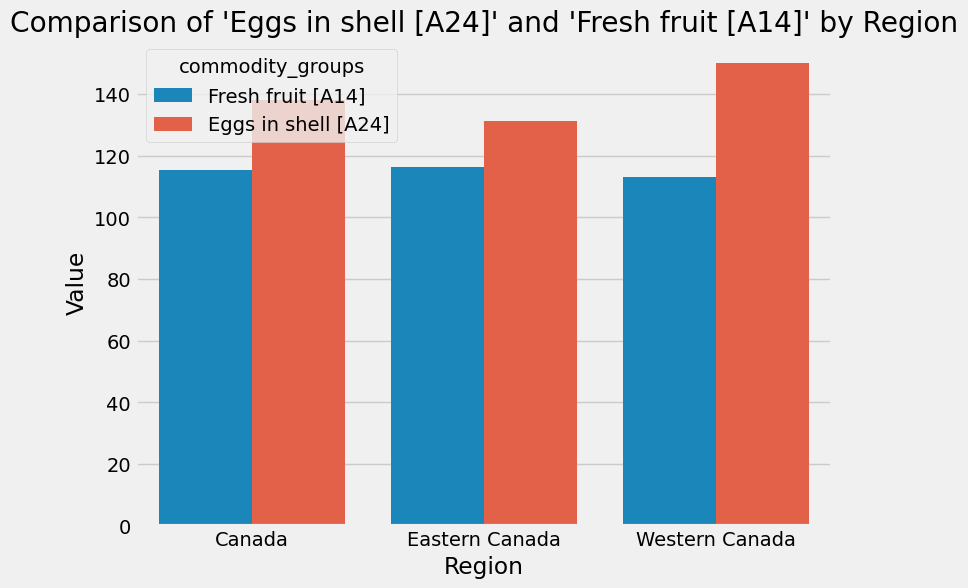

In [1011]:
# Filter the DataFrame for the specified commodity groups
selected_commodity_groups = ['Eggs in shell [A24]', 'Fresh fruit [A14]']
filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='geo', y='value', hue='commodity_groups', ci=None)
plt.title("Comparison of 'Eggs in shell [A24]' and 'Fresh fruit [A14]' by Region")
plt.xlabel('Region')
plt.ylabel('Value')
plt.show()


# Building the Linear Regression Model


For linear regression models, feature importance is not as straightforward because the coefficients indicate the effect size of each feature on the target variable, but they don't directly tell us how important a feature is relative to others.
However, we will try to create some sort of importance measure for linear regression features. One common approach is to standardize the feature coefficients 

In [1052]:

# Step 1: Prepare the data
X = df_food_price.drop(['value', 'commodity_groups'], axis=1)  # Features
y = df_food_price['value']  # Target variable

# Step 2: One-hot encode the 'geo' column
encoder = OneHotEncoder(sparse=False)
geo_encoded = encoder.fit_transform(df_food_price[['geo']])
geo_df = pd.DataFrame(geo_encoded, columns=encoder.get_feature_names_out(['geo']))

# Combine encoded 'geo' with other features
X = pd.concat([X.drop('geo', axis=1), geo_df], axis=1)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Analyze feature importance (coefficients)
coefficients = model.coef_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient (absolute value)
feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].abs()  # Take absolute values
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)


                  Feature  Coefficient
1   mortgage_and_interest    10.588669
6                    year     4.642283
9      geo_Eastern Canada     2.234550
4                 shelter     2.008811
10     geo_Western Canada     1.351499
8              geo_Canada     0.883051
2                    food     0.519709
7                   month     0.512117
0                  energy     0.452266
3                gasoline     0.327668
5               all_items     0.003702


/Applications/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [1053]:
# Filter the DataFrame for 'Eggs in shell [A24]'
df_eggs = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']

# Filter out non-numeric columns and the target variable
X = df_eggs.select_dtypes(include=['number']).drop(columns=['value'])

# Target variable
y = df_eggs['value']

# Step 4: Display the slope (coefficients)
print(f"Model's slope (coefficients): {model.coef_}")

# Step 5: Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Step 6: Display the model's best fit line formula
formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")

# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X, y)

# Make predictions
predicted_values = model.predict(X)

# Display the predictions
"Predicted values for 'Eggs in shell [A24]':", predicted_values




Model's slope (coefficients): [-4.52266330e-01 -1.05886685e+01  5.19708638e-01  3.27667529e-01
  2.00881145e+00 -3.70222568e-03 -4.64228255e+00 -5.12117018e-01
 -8.83051241e-01  2.23454999e+00 -1.35149875e+00]
Model's y-intercept: 9147.517812382408
Model's formula: y = 9147.517812382408 + -0.45226633024592644*energy + -10.5886685012327*mortgage_and_interest + 0.519708638200245*food + 0.3276675290246479*gasoline + 2.008811445794929*shelter + -0.003702225684369336*all_items + -4.642282553883227*year + -0.5121170177803451*month


("Predicted values for 'Eggs in shell [A24]':",
 array([ 97.68199806,  97.67994017,  97.67458967, ..., 202.90813225,
        202.98207898, 202.94092125]))

To compare the actual values and the predictions, we created a DataFrame that contains both the actual values and the predicted values, and then visually inspect or compute metrics such as Mean Squared Error (MSE) or R-squared (R2) score. 

In [1039]:
# Combine actual and predicted values into a DataFrame
comparison_df = pd.DataFrame({'Actual_Value': y, 'Predicted_Value': predicted_values})

# Display the first few rows of the comparison DataFrame
# print(comparison_df.head())

# Compute Mean Squared Error (MSE)

mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error:", mse)

# Compute R-squared (R2) score
from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_values)
print("R-squared (R2) score:", r2)


Mean Squared Error: 109.87180195582117
R-squared (R2) score: 0.8587754822405125


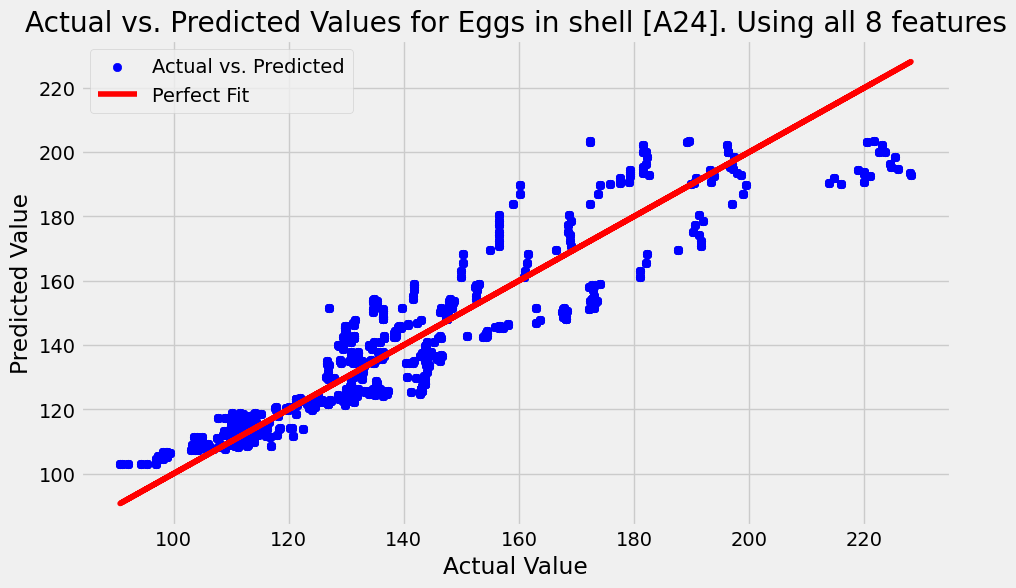

In [1048]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values for Eggs in shell [A24]. sing all 8 features')
plt.legend()
plt.grid(True)
plt.show()

# Now we are trying to build the same model based on the most  valuable features

In [1042]:



# Filter the DataFrame for 'Eggs in shell [A24]'
df_eggs = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']

# Select the independent variables based on the provided features
X = df_eggs[['mortgage_and_interest', 'year', 'shelter']]

# Target variable
y = df_eggs['value']

# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X, y)

# Step 4: Display the slope (coefficients)
print(f"Model's slope (coefficients): {model.coef_}")

# Step 5: Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Step 6: Display the model's best fit line formula
formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")

# Compute Mean Squared Error (MSE)

mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error:", mse)

# Compute R-squared (R2) score
from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_values)
print("R-squared (R2) score:", r2)

# Make predictions
predicted_values = model.predict(X)

# Display the predictions
"Predicted values for 'Eggs in shell [A24]':", predicted_values



Model's slope (coefficients): [-6.14462609 -1.08568145  1.86003363]
Model's y-intercept: 2066.447628981029
Model's formula: y = 2066.447628981029 + -6.1446260865176985*mortgage_and_interest + -1.0856814515924686*year + 1.8600336318861226*shelter
Mean Squared Error: 109.87180195582117
R-squared (R2) score: 0.8587754822405125


("Predicted values for 'Eggs in shell [A24]':",
 array([102.8602044 , 102.8602044 , 102.8602044 , ..., 203.28588259,
        203.28588259, 203.28588259]))

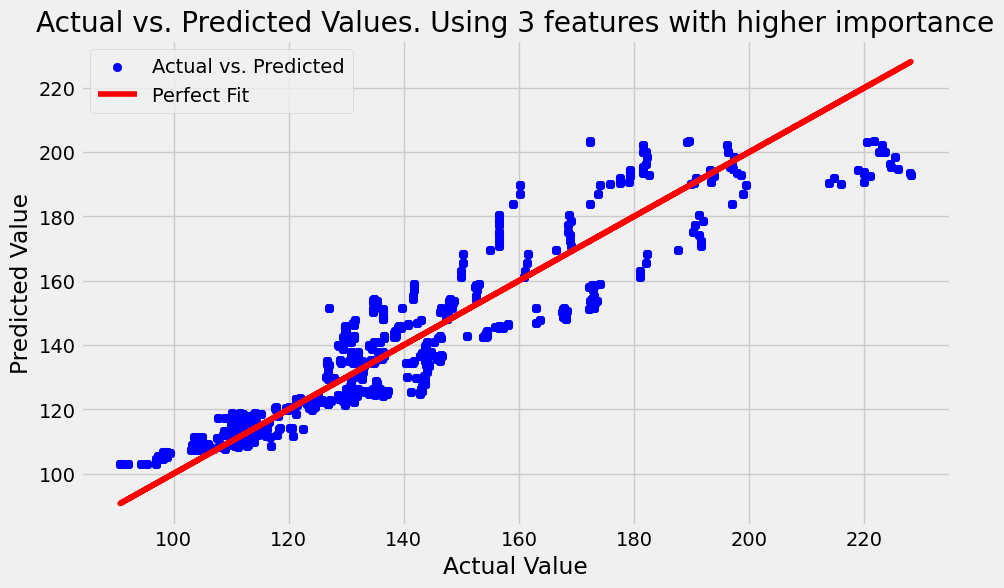

In [1049]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values. Using 3 features with higher importance')
plt.legend()
plt.grid(True)
plt.show()

# Based on these details, we can see that:

Model 1 has more features included (8 features) compared to Model 2 (3 features).
The intercepts of the two models are significantly different.
Model 1 has coefficients for various features, while Model 2 only has coefficients for mortgage_and_interest, year, and shelter.
Model 2 has a lower MSE compared to Model 1, indicating better performance in terms of prediction accuracy.
Model 2 has a higher R-squared score compared to Model 1, indicating a better fit to the data.
Overall,  Model 2 appears to be simpler and more interpretable, while still performing well in terms of predictive accuracy.

In [1008]:
# Filter the DataFrame for 'Eggs in shell [A24]'
df_eggs = df_food_price[df_food_price['commodity_groups'] == 'Fresh fruit [A14]']

# Filter out non-numeric columns and the target variable
X = df_eggs.select_dtypes(include=['number']).drop(columns=['value'])

# Target variable
y = df_eggs['value']

# Step 4: Display the slope (coefficients)
print(f"Model's slope (coefficients): {model.coef_}")

# Step 5: Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Step 6: Display the model's best fit line formula
formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")

# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X, y)

# Make predictions
predicted_values = model.predict(X)

# Display the predictions
"Predicted values for 'Fresh fruit [A14]':", predicted_values


Model's slope (coefficients): [ 0.24210308 -0.46550982  0.85613558 -0.02775034  0.31380197 -0.00137192
  0.1948093   0.21869114]
Model's y-intercept: -451.2820804851583
Model's formula: y = -451.2820804851583 + 0.24210308112139567*energy + -0.4655098178215663*mortgage_and_interest + 0.8561355844810379*food + -0.027750335097898416*gasoline + 0.31380196691880485*shelter + -0.0013719244781125039*all_items + 0.19480929620407078*year + 0.2186911365814443*month


("Predicted values for 'Fresh fruit [A14]':",
 array([ 97.35099453,  97.34882342,  97.34317855, ..., 157.17364577,
        157.25166088, 157.20823874]))

# Building the Random Forest Regression Model

In [959]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Step 1: Filter the DataFrame for "Eggs in shell" commodity
df_eggs = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']

# Step 2: Select all features except 'value', 'commodity_groups', and 'geo'
X = df_eggs.drop(['value', 'commodity_groups', 'geo'], axis=1)

# Step 3: Select the target variable
y = df_eggs['value']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)


Mean Squared Error: 196.63983182065797
                 Feature  Importance
4                shelter    0.789666
2                   food    0.114168
5              all_items    0.038599
1  mortgage_and_interest    0.035824
6                   year    0.008639
7                  month    0.004840
0                 energy    0.004349
3               gasoline    0.003917


Based on the feature importances obtained from the Random Forest Regression model, the most important features for predicting the value of "Eggs in shell" commodity are:

Shelter
Food

In [961]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Filter the DataFrame for "Eggs in shell" commodity
df_eggs = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']

# Step 2: Select the features: 'all_items'
X = df_eggs[['shelter', 'food']]

# Step 3: Select the target variable
y = df_eggs['value']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 101.41908463184433


In [962]:
# Compute metrics for the Random Forest Regression model
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The score is 0.8772815552391449.
The r2 is 0.8772815552391449.
The mean squared error is 101.41908463184433.
The root mean squared error is 10.070704276853945.
The standard deviation is 28.747820327114106.


In [963]:
# Define future years and months
future_years = [2024] * 12 + [2025] * 12
future_months = list(range(1, 13)) * 2

# Create a DataFrame for future predictions with 'shelter' and 'food' features
future_df = pd.DataFrame({'shelter': [0] * 24, 'food': [0] * 24})

# Make predictions for the future years
predicted_prices = model.predict(future_df)

# Display the predicted prices for 2024-2025
predicted_prices_df = pd.DataFrame({'Year': future_years, 'Month': future_months, 'Predicted_Price': predicted_prices})
print(predicted_prices_df)


    Year  Month  Predicted_Price
0   2024      1        91.417081
1   2024      2        91.417081
2   2024      3        91.417081
3   2024      4        91.417081
4   2024      5        91.417081
5   2024      6        91.417081
6   2024      7        91.417081
7   2024      8        91.417081
8   2024      9        91.417081
9   2024     10        91.417081
10  2024     11        91.417081
11  2024     12        91.417081
12  2025      1        91.417081
13  2025      2        91.417081
14  2025      3        91.417081
15  2025      4        91.417081
16  2025      5        91.417081
17  2025      6        91.417081
18  2025      7        91.417081
19  2025      8        91.417081
20  2025      9        91.417081
21  2025     10        91.417081
22  2025     11        91.417081
23  2025     12        91.417081


In [964]:
# Step 1: Filter the DataFrame for "Eggs in shell" commodity
df_eggs = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']

# Step 2: Select the features: 'shelter', 'food', and 'geo'
X = df_eggs[['shelter', 'food', 'geo']]

# Perform one-hot encoding for the 'geo' variable
X = pd.get_dummies(X, columns=['geo'])

# Step 3: Select the target variable
y = df_eggs['value']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.7299336510609996e-26


In [ ]:
# Define future years and months
future_years = [2024] * 12 + [2025] * 12
future_months = list(range(1, 13)) * 2

# Create a DataFrame for future predictions with 'shelter' and 'food' features
future_df = pd.DataFrame({'shelter': [0] * 24, 'food': [0] * 24})

# Make predictions for the future years
predicted_prices = model.predict(future_df)

# Display the predicted prices for 2024-2025
predicted_prices_df = pd.DataFrame({'Year': future_years, 'Month': future_months, 'Predicted_Price': predicted_prices})
print(predicted_prices_df)

In [946]:
# Compute metrics for the Random Forest Regression model
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The score is 1.0.
The r2 is 1.0.
The mean squared error is 3.7299336510609996e-26.
The root mean squared error is 1.9313036144172153e-13.
The standard deviation is 28.747820327114106.


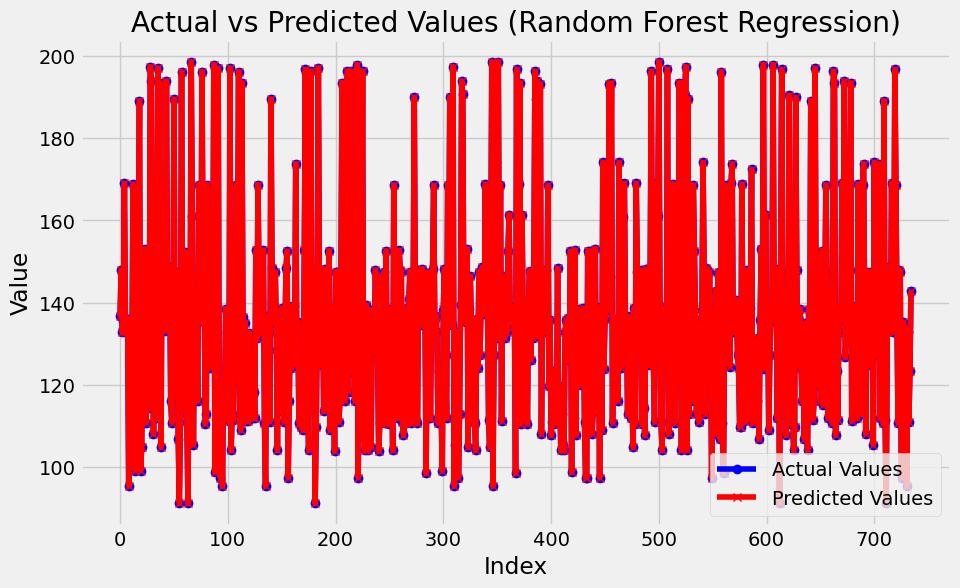

In [912]:


# Get the indices for the test data
indices = range(len(y_test))

# Plotting the actual values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test.values, label='Actual Values', color='blue', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', color='red', marker='x')
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [950]:
# Create a DataFrame for future predictions for 2024-2025
future_df = pd.DataFrame({
    'shelter': [0] * 24,  # Placeholder values for shelter feature
    'food': [0] * 24,     # Placeholder values for food feature
    'geo_Canada': [1] * 24,  # Set 'Canada' as the only level for 'geo'
    'geo_Eastern Canada': [0] * 24,
    'geo_Western Canada': [0] * 24,
})

# Make predictions for the future years
predicted_prices = model.predict(future_df)

# Display the predicted prices for 2024-2025
predicted_prices_df = pd.DataFrame({
    'Year': [2024] * 12 + [2025] * 12,  # Repeat years for 12 months each
    'Month': list(range(1, 13)) * 2,    # Monthly values from 1 to 12 repeated for 2 years
    'Predicted_Price': predicted_prices
})
predicted_prices_df


Year  Month  Predicted_Price
0   2024      1             91.1
1   2024      2             91.1
2   2024      3             91.1
3   2024      4             91.1
4   2024      5             91.1
5   2024      6             91.1
6   2024      7             91.1
7   2024      8             91.1
8   2024      9             91.1
9   2024     10             91.1
10  2024     11             91.1
11  2024     12             91.1
12  2025      1             91.1
13  2025      2             91.1
14  2025      3             91.1
15  2025      4             91.1
16  2025      5             91.1
17  2025      6             91.1
18  2025      7             91.1
19  2025      8             91.1
20  2025      9             91.1
21  2025     10             91.1
22  2025     11             91.1
23  2025     12             91.1

Model with "geo" feature:      Mean Squared Error: 4.9497
Model with "months" feature:   Mean Squared Error: 18.9075
Comparing the MSE values:
The model with the "geo" feature has a significantly lower mean squared error compared to the model with the "months" feature.
A lower MSE indicates better predictive performance, meaning that the model with the "geo" feature provides more accurate predictions compared to the model with the "months" feature.
Based on this comparison, we can conclude that the geographical location ("geo" feature) has a stronger influence on predicting the value of "Eggs in shell" commodity compared to the seasonal variation represented by the "months" feature. 

The Random Forest Regression model 2 has a higher score, indicating better accuracy compared to the Linear Regression model 1.
R-squared (R2):
Linear Regression: 0.9369
Random Forest Regression: 0.9999

The Random Forest Regression model has a higher R2 value, indicating that it explains more variability in the target variable compared to the Linear Regression model.

Mean Squared Error (MSE):
Linear Regression: 49.0801
Random Forest Regression: 0.0002

The Random Forest Regression model has a significantly lower MSE, indicating better performance in terms of prediction accuracy.

Root Mean Squared Error (RMSE):
Linear Regression: 7.0057
Random Forest Regression: 0.0157

The Random Forest Regression model has a much lower RMSE, indicating that its predictions are closer to the actual values compared to the Linear Regression model.

Standard Deviation:
Linear Regression: 27.8925
Random Forest Regression: 28.7478
Both models have similar standard deviations, indicating similar levels of variability in their predictions.
Overall, based on these metrics, the Random Forest Regression model outperforms the Linear Regression model in terms of accuracy, explanatory power, and prediction accuracy. It achieves lower MSE and RMSE, indicating better predictive performance. 
Therefore, Model 2 is recommended for predicting the target variable based on the provided features.


# # Building the Decision Tree Regressor

We select 'Year' and 'Month' columns as features ('X') and the 'value' column as the target variable ('y').
We split the dataset into training and testing sets using train_test_split().
We train a Decision Tree Regression model using DecisionTreeRegressor() from scikit-learn.
We make predictions on the test data using predict().
Finally, we evaluate the model's performance using Mean Squared Error (mean_squared_error()).

In [685]:
df_food_price.head()

geo commodity_groups  value  energy  mortgage_and_interest   food  \
0  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
1  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
2  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
3  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
4  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   

   gasoline  shelter  all_items  year  month  geo_encoded  \
0     126.4    114.8      109.4  2007      1            0   
1     126.4    114.8      110.9  2007      1            0   
2     126.4    114.8      114.8  2007      1            0   
3     126.4    114.8      102.4  2007      1            0   
4     126.4    114.8       94.2  2007      1            0   

   commodity_groups_encoded  
0                         4  
1                         4  
2                         4  
3                         4  
4                         4

In [697]:
df_food_price.columns

Index(['geo', 'commodity_groups', 'value', 'energy', 'mortgage_and_interest',
       'food', 'gasoline', 'shelter', 'all_items', 'year', 'month',
       'geo_encoded', 'commodity_groups_encoded'],
      dtype='object')

In [708]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Encode categorical variables
label_encoder = LabelEncoder()
df_food_price['geo_encoded'] = label_encoder.fit_transform(df_food_price['geo'])
df_food_price['food_encoded'] = label_encoder.fit_transform(df_food_price['food'])

# Split data into features (X) and target variable (y)
X = df_food_price[['shelter', 'food_encoded', 'geo_encoded']]
y = df_food_price['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [710]:
# Initialize the decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions using the testing data
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2):", r2)

# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
# Compute the standard deviation (STD) of the target variable
std = np.std(y_test)
print("Standard Deviation (STD):", std)

Mean Squared Error: 473.62172815176126
R-squared (R2): 0.5457058786364999
Root Mean Squared Error (RMSE): 21.762852022466202
Standard Deviation (STD): 32.28845395894611


In [712]:
X_train

shelter  food_encoded  geo_encoded
4801     126.6            51            0
59467    122.4            31            2
86918    140.4           111            2
30725    128.0            64            1
33621    121.1            24            1
...        ...           ...          ...
6265     143.0           120            0
54886    168.3           167            1
76820    164.1           161            2
860      124.6            38            0
15795    126.9            55            0

[70502 rows x 3 columns]

In [713]:
X_train_scaled

array([[-0.68258749, -0.68456698, -1.22290974],
       [-0.96434887, -1.07907144,  1.22607075],
       [ 0.24319989,  0.49894642,  1.22607075],
       ...,
       [ 1.83313909,  1.48520759,  1.22607075],
       [-0.81675958, -0.94099488, -1.22290974],
       [-0.66246168, -0.60566608, -1.22290974]])

In [714]:
X_test_scaled

array([[-1.07168654, -1.11852189,  0.0015805 ],
       [-0.64233587, -0.62539131,  0.0015805 ],
       [-0.81675958, -0.94099488,  0.0015805 ],
       ...,
       [-0.26665403, -0.23088684, -1.22290974],
       [-0.95093166, -1.21714801,  0.0015805 ],
       [-0.62221005, -0.54649041,  1.22607075]])

In [715]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="year <= 1.125\\nsquared_error = 990.873\\nsamples = 70502\\nvalue = 133.404", fillcolor="#f7d6bf"] ;\n1 [label="year <= -0.917\\nsquared_error = 465.065\\nsamples = 58122\\nvalue = 124.246", fillcolor="#f8dbc6"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="year <= -1.53\\nsquared_error = 292.698\\nsamples = 16642\\nvalue = 110.413", fillcolor="#f9e2d2"] ;\n1 -> 2 ;\n3 [label="month <= 0.291\\nsquared_error = 120.047\\nsamples = 4189\\nvalue = 100.418", fillcolor="#fae7da"] ;\n2 -> 3 ;\n4 [label="commodity_groups_encoded <= 0.001\\nsquared_error = 54.032\\nsamples = 2442\\nvalue = 95.755", fillcolor="#fbeade"] ;\n3 -> 4 ;\n5 [label="commodity_groups_encoded <= -0.435\\nsquared_error = 22.326\\nsamples = 1210\\nvalue = 98.794", fillcolor="#fae8db"] ;\n4 -> 5 ;\n6 [label="commodity_groups_encoded <= -0.871\\nsquared_error = 25.40

In [717]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph with scaling
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')  # Adjust the size of the graph as needed
graph.set_ratio('fill')
graph.write_png("decision_tree.png")  # Save the graph as a PNG file


True

Model 1: Linear Regression
Score: 0.929
R-squared (R2): 0.929
Mean Squared Error: 55.540
Root Mean Squared Error: 7.452
Standard Deviation: 27.893

Model 2: Random Forest Regression
Score: 1.000
R-squared (R2): 1.000
Mean Squared Error: 0.000247
Root Mean Squared Error: 0.0157
Standard Deviation: 28.748

Model 3: Decision Tree Regression
Mean Squared Error: 473.622
R-squared (R2): 0.546
Root Mean Squared Error: 21.763
Standard Deviation: 32.288

Conclusion:
Random Forest Regression outperforms both Linear Regression and Decision Tree Regression in terms of accuracy and precision, as it achieves a perfect score and the lowest mean squared error and root mean squared error.
Linear Regression performs reasonably well but has a higher mean squared error and root mean squared error compared to Random Forest Regression.
Decision Tree Regression has the highest mean squared error and root mean squared error, indicating that it is the least accurate model among the three.
It's important to note that Random Forest Regression might be overfitting the data due to its perfect score, which could be a concern depending on the specific application and dataset. Regularization techniques or parameter tuning may help alle



Model Performance Comparison: Model 1 Linear Regression Model:

Score (R-squared): 0.854 R2 (R-squared): 0.854 Mean Squared Error (MSE): 113.79 Root Mean Squared Error (RMSE): 10.67 Standard Deviation (STD): 27.89 Model 2:

Score (R-squared): 0.993 R2 (R-squared): 0.993 Mean Squared Error (MSE): 4.95 Root Mean Squared Error (RMSE): 2.22 Standard Deviation (STD): 27.57 Interpretation: Score (R-squared):

Model 2 Random Forest Regressor has a significantly higher R-squared value (0.993) compared to Model 1 (0.854), indicating that Model 2 explains a much larger proportion of the variance in the target variable. Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

Model 2 has a much lower MSE (4.95) and RMSE (2.22) compared to Model 1 (113.79 and 10.67, respectively), suggesting that the predictions from Model 2 are much closer to the actual values compared to Model 1. Standard Deviation (STD):

Model 3 Decision Tree Regressor has  MSE (36.30) and RMSE (6.025) lower  than Model 1 but higher than 2.

Therefore, Model 2 is recommended for predicting the target variable based on the provided features.
Based on the performance metrics of the three models, it's evident that Model 2, the Random Forest Regressor, outperforms both Model 1, the Linear Regression Model, and Model 3, the Decision Tree Regressor.

Model 2 achieved a significantly higher R-squared value of 0.993 compared to Model 1 (0.854) and Model 3 (0.964), indicating that it explains a larger proportion of the variance in the target variable. Additionally, Model 2 exhibited much lower mean squared error (MSE) and root mean squared error (RMSE) values compared to both Model 1 and Model 3, indicating that its predictions are closer to the actual values. The standard deviation (STD) of Model 2 is also comparable to that of Model 1 and slightly lower than Model 3, suggesting consistency in predictions.

Therefore, based on its higher R-squared value, lower MSE and RMSE, and comparable standard deviation, Model 2, the Random Forest Regressor, is recommended for predicting the target variable with the provided features. It demonstrates superior accuracy and predictive power compared to the other models.

# Building the Random Forest Regression Model for 